In [2]:
!git clone https://github.com/NicoEssi/Undercomplete_Autoencoder.git

Cloning into 'Undercomplete_Autoencoder'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
training_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_trn.csv", header = None)
training_set0 = np.array(training_set0, dtype = "int")

training_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_trn.csv", header = None)
#training_set1 = np.array(training_set1, dtype = "int")

test_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_tst.csv", header = None)
test_set0 = np.array(test_set0, dtype = "int")

test_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_tst.csv", header = None)
#test_set1 = np.array(test_set1, dtype = "int")

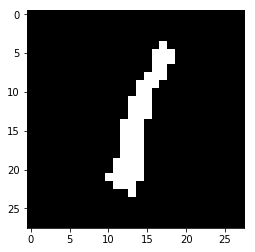

In [6]:
def displayMNIST(data, index):
    display_number = data[index, :]
    display_number = display_number.reshape([28, 28])
    plt.imshow(display_number, cmap='gray')
    plt.show
    
def displayMNIST_alt(image):
    image = image.reshape([28,28])
    plt.imshow(image, cmap='gray')
    plt.show

displayMNIST(training_set0, 137) # test 0
#displayMNIST(test_set0, 137) # test 0

In [0]:
trn_data = torch.cuda.FloatTensor(training_set0)
tst_data = torch.cuda.FloatTensor(test_set0)

In [0]:
class autoenc(nn.Module):
    def __init__(self, nodes = 100):
        super(autoenc, self).__init__() # inheritence
        self.full_connection0 = nn.Linear(784, nodes) # encoding weights
        self.full_connection1 = nn.Linear(nodes, 784) # decoding weights
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.full_connection0(x)) # input encoding
        x = self.full_connection1(x) # output decoding
        return x

In [0]:
model = autoenc().cuda() #.cuda() - to move to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),
                          lr = 1e-3, weight_decay = 1/2)



In [0]:
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)